In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage import io, transform
from PIL import Image

from dataset import HandWritingLinesDataset
from preprocessing import Rescale

In [7]:
import os
import config
from xml.dom import minidom

path = config.DATASET_PATH
xml_files = []
for (_, _, file) in os.walk(path + "xml"):
    xml_files.extend(file)

xml_files = [xml_file for xml_file in xml_files if xml_file.endswith("xml")]

line_data = []
for xml_file in tqdm(xml_files):
    xml_data = minidom.parse(path + "xml/" + xml_file)
    items = xml_data.getElementsByTagName('line')
    for item in items:
        if len(item.attributes['text'].value) < config.MAX_LEN_ALLOWED:
            line_data.append((item.attributes['id'].value, item.attributes['text'].value))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1539/1539 [00:47<00:00, 32.61it/s]


In [8]:
line_data_data[:5]

[('a01-000u-00', 'A MOVE to stop Mr. Gaitskell from'),
 ('a01-000u-01', 'nominating any more Labour life Peers'),
 ('a01-000u-02', 'is to be made at a meeting of Labour'),
 ('a01-000u-03', 'M Ps tomorrow. Mr. Michael Foot has'),
 ('a01-000u-04', 'put down a resolution on the subject')]

In [12]:
def getImagePath(name_split):
    name_split = name_split.split('-')
    return path + "lines/" + name_split[0] + "/" + name_split[0] + "-" + name_split[1] + "/" + name_split[0] + "-" + name_split[1] + "-" + name_split[2] + ".png"

In [14]:
import shutil

for name, text in tqdm(line_data):
    source = getImagePath(name)
    destination = path + "../line/" + name + ".png"
    shutil.copyfile(source, destination)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13352/13352 [02:30<00:00, 88.81it/s]


In [28]:
import csv

with open(path + "../line/text.csv",'w') as out:
    csv_out = csv.writer(out)
    csv_out.writerow(['name', 'text'])
    for row in line_data:
        csv_out.writerow(row)

In [9]:
import pandas as pd
import numpy as np
import os
import config
from xml.dom import minidom

path = config.DATASET_PATH

csv_file = pd.read_csv(path + "line_data.csv")
# csv_file.to_csv(path + "line_data.csv", index=False)
np.array(csv_file.to_numpy())[:5, 0]

array(['a01-000u-00', 'a01-000u-01', 'a01-000u-02', 'a01-000u-03',
       'a01-000u-04'], dtype=object)

In [5]:
import os
import config
from xml.dom import minidom

path = config.DATASET_PATH
xml_files = []
for (_, _, file) in os.walk(path + "../original/xml/"):
    xml_files.extend(file)

xml_files = [xml_file for xml_file in xml_files if xml_file.endswith("xml")]

word_data = []
for xml_file in tqdm(xml_files):
    xml_data = minidom.parse(path + "../original/xml/" + xml_file)
    items = xml_data.getElementsByTagName('word')
    for item in items:
        word_data.append((item.attributes['id'].value, item.attributes['text'].value))
        
word_data

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1539/1539 [00:21<00:00, 70.53it/s]


[('a01-000u-00-00', 'A'),
 ('a01-000u-00-01', 'MOVE'),
 ('a01-000u-00-02', 'to'),
 ('a01-000u-00-03', 'stop'),
 ('a01-000u-00-04', 'Mr.'),
 ('a01-000u-00-05', 'Gaitskell'),
 ('a01-000u-00-06', 'from'),
 ('a01-000u-01-00', 'nominating'),
 ('a01-000u-01-01', 'any'),
 ('a01-000u-01-02', 'more'),
 ('a01-000u-01-03', 'Labour'),
 ('a01-000u-01-04', 'life'),
 ('a01-000u-01-05', 'Peers'),
 ('a01-000u-02-00', 'is'),
 ('a01-000u-02-01', 'to'),
 ('a01-000u-02-02', 'be'),
 ('a01-000u-02-03', 'made'),
 ('a01-000u-02-04', 'at'),
 ('a01-000u-02-05', 'a'),
 ('a01-000u-02-06', 'meeting'),
 ('a01-000u-02-07', 'of'),
 ('a01-000u-02-08', 'Labour'),
 ('a01-000u-03-00', 'M Ps'),
 ('a01-000u-03-01', 'tomorrow'),
 ('a01-000u-03-02', '.'),
 ('a01-000u-03-03', 'Mr.'),
 ('a01-000u-03-04', 'Michael'),
 ('a01-000u-03-05', 'Foot'),
 ('a01-000u-03-06', 'has'),
 ('a01-000u-04-00', 'put'),
 ('a01-000u-04-01', 'down'),
 ('a01-000u-04-02', 'a'),
 ('a01-000u-04-03', 'resolution'),
 ('a01-000u-04-04', 'on'),
 ('a01-000u-0

In [9]:
print(len(word_data))
word_data = [(name, text) for (name, text) in word_data if (name != "a01-117-05-02" and name != "r06-022-03-05")]
print(len(word_data))

115319
115318


In [10]:
def getWordImagePath(name):
    name_split = name.split('-')
    return path + "../original/words/" + name_split[0] + "/" + name_split[0] + "-" + name_split[1] + "/" + name_split[0] + "-" + name_split[1] + "-" + name_split[2] + "-" + name_split[3] + ".png"

In [11]:
import shutil

for name, text in tqdm(word_data):
    source = getWordImagePath(name)
    destination = path + "../words/" + name + ".png"
    shutil.copyfile(source, destination)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 115320/115320 [11:35<00:00, 165.90it/s]


In [10]:
import csv
import pandas as pd
import numpy as np
import os
import config
from xml.dom import minidom

with open(path + "../words/text_data.csv",'w') as out:
    csv_out = csv.writer(out)
    csv_out.writerow(['name', 'text'])
    for row in word_data:
        csv_out.writerow(row)

csv_file = pd.read_csv(path + "../words/text_data.csv")
csv_file.to_csv(path + "../words/text_data.csv", index=False)
np.array(csv_file.to_numpy())[:5, 0]

array(['a01-000u-00-00', 'a01-000u-00-01', 'a01-000u-00-02',
       'a01-000u-00-03', 'a01-000u-00-04'], dtype=object)

In [ ]:
import csv
import pandas as pd
import numpy as np
import os
import config
from xml.dom import minidom



57701
14439
the
(1, 32, 32)
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]


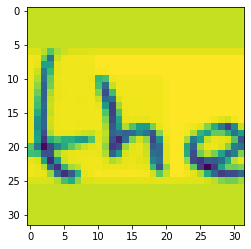

None


In [22]:
## import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage import io, transform
from PIL import Image

from dataset import HandWritingLinesDataset
from preprocessing import Rescale
import config
from random import random

transform = transforms.Compose([
    Rescale((config.IMAGE_H, config.IMAGE_W)),
    transforms.Normalize(mean=(239,), std=(52,))
])

dataset = HandWritingLinesDataset(transform=transform)

MAX_H = 342
AVG_H = 122.32719239122295
MAX_W = 1581
AVG_W = 1697.893881524751
MAX_RATIO_H_W = 0.7052631578947368
MAX_RATIO_W_H = 40.04

i = int(random() * 57701)
# i = 4121
print(len(dataset))
print(i)

# print(dataset[i]["image"].size())
# print(dataset[i]["image"])
# print(dataset[i]["image"].numpy())
# print(dataset.show_image(i))
# print(dataset.show_image(dataset[i]["image"]))

import IPython, PIL
import numpy as np
print(dataset[i]["text"])
print(dataset[i]["image"].numpy().shape)
print(dataset[i]["image"].numpy() > 0)
print(dataset.show_image(dataset[i]["image"]))
# IPython.display.display(PIL.Image.fromarray(np.uint8(dataset[i]["image"].squeeze(0).numpy() * 255), 'L'))

In [ ]:
dataset[0:5]

In [69]:
class Rescale(object):
    def __init__(self, output_size):
        self.output_size = output_size

    def __call__(self, sample):
        image, text = sample['image'], sample['text']

        h, w = image.shape[:2]
        if (h / w) > (self.output_size[0] / self.output_size[1]):
            req_w = (h * self.output_size[1]) / self.output_size[0]
            image = F.pad(image, (0, int(req_w) - w, 0, 0), value=255, mode="constant")
        elif (h / w) < (self.output_size[0] / self.output_size[1]):
            req_h = (w * self.output_size[0]) / self.output_size[1]
            image = F.pad(image, (0, 0, int((req_h - h) // 2), int((req_h - h) // 2)), value=255, mode="constant")
        
        print(type(image))
        new_h, new_w = self.output_size
        image = image.squeeze(0)
        image = torch.tensor(transform.resize(image, (new_h, new_w)))
        
        return {'image': image, 'text': text}

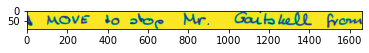

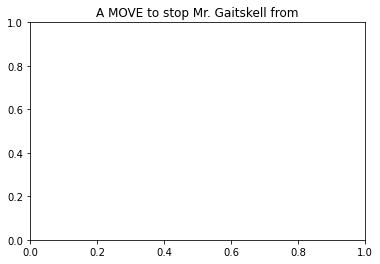

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [70]:
dataset.show_image(0)
rescaler = Rescale([128, 1024])
image = rescaler(dataset[0])["image"]
print(type(image))

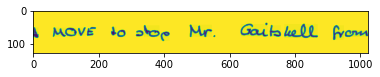

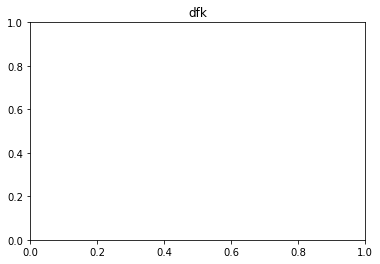

<class 'torch.Tensor'>


In [71]:
dataset.show_image({"image": image, "text": "dfk"})
print(type(image))

In [6]:
t = torch.tensor([[1.0, 1.0], [1.0, 1.0]], dtype=torch.float)

In [7]:
toPIL = transforms.ToPILImage()
pt = toPIL(t)
print(list(pt.getdata()))

[255, 255, 255, 255]


In [9]:
toTensor = transforms.ToTensor()
t = toTensor(pt)
print(t)

tensor([[[1., 1.],
         [1., 1.]]])


In [72]:
print(dataset[0])

{'image': tensor([[255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.],
        ...,
        [255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.]]), 'text': 'A MOVE to stop Mr. Gaitskell from'}


In [76]:
MAX_LEN = len(dataset[0]["text"])
MIN_LEN = len(dataset[0]["text"])
AVG_LEN = 0

for data in tqdm(dataset):
    MAX_LEN = max(MAX_LEN, len(data["text"]))
    MIN_LEN = min(MIN_LEN, len(data["text"]))
    AVG_LEN += len(data["text"])
    
AVG_LEN /= len(dataset)
print("Maximum Length of Text:", MAX_LEN)
print("Minimum Length of Text:", MIN_LEN)
print("Average Length of Text:", AVG_LEN)

100%|███████████████████████████████████████████████████████████████████████████| 13353/13353 [00:22<00:00, 594.16it/s]

Maximum Length of Text: 97
Minimum Length of Text: 1
Average Length of Text: 42.684190818542646


 28%|████████████████████▉                                                       | 3683/13353 [00:06<00:17, 559.29it/s]

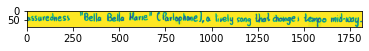

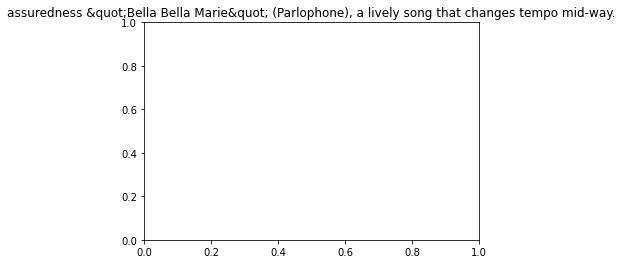

 28%|█████████████████████▌                                                      | 3794/13353 [00:06<00:25, 372.44it/s]

assuredness &quot;Bella Bella Marie&quot; (Parlophone), a lively song that changes tempo mid-way.


 29%|██████████████████████▏                                                     | 3895/13353 [00:06<00:22, 427.98it/s]

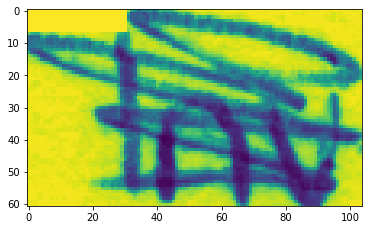

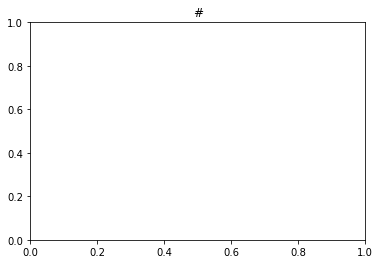

 30%|██████████████████████▋                                                     | 3993/13353 [00:07<00:30, 308.65it/s]

#


 67%|███████████████████████████████████████████████████                         | 8981/13353 [00:21<00:10, 420.77it/s]


KeyboardInterrupt: 

In [79]:
for i, data in enumerate(tqdm(dataset)):
    if len(data["text"]) == MIN_LEN or len(data["text"]) == MAX_LEN:
        dataset.show_image(i)
        print(data["text"])

In [3]:
for i, data in enumerate(tqdm(dataset)):
    if '&' in data["text"]:
        print(i, data["text"])

 47%|███████████████████████████████████▉                                        | 6308/13353 [00:21<00:21, 332.09it/s]

6271 sole, a baked leg of mutton with oyster & veal stuffing and a


 53%|████████████████████████████████████████                                    | 7042/13353 [00:23<00:18, 341.25it/s]

7004 is high & I have not yet thought of a fire....
7014 & I have not yet thought of a fire....
7021 but the temperature is high & I have not
7029 damp, but the temperature is high & I have not yet
7037 high & I have not yet thought of a fire....
7043 is high & I have not yet thought of a fire....
7049 rain and damp, but the temperature is high & I have not
7057 temperature is high & I have not yet thought of
7065 & I have not yet thought of a fire....


 53%|████████████████████████████████████████▍                                   | 7114/13353 [00:23<00:19, 319.90it/s]

7073 temperature is high & I have not yet
7082 & I have not yet thought of a fire....
7088 and damp, but the temperature is high & I have not yet
7097 & I have not yet thought of a fire....
7108 temperature is high & I have
7117 rature is high & I have not yet
7125 temperature is high & I have not yet thought of a
7132 been much rain and damp, but the temperature is high &


 55%|█████████████████████████████████████████▌                                  | 7310/13353 [00:24<00:16, 368.03it/s]

7252 a mass of Radicalism, & then God knows
7263 of Radicalism, & then God knows what
7271 must be had, will be a mass of Radicalism, & then
7279 be had, will be a mass of Radicalism, & then God
7287 mass of Radicalism, & then God knows what may happen....
7293 a mass of Radicalism, & then God knows what may happen....
7300 of Radicalism, & then God knows what may happen....
7308 of Radicalism, & then God knows what may
7316 mass of Radicalism, & then God knows what may happen....
7325 Radicalism, & then God knows what


 55%|██████████████████████████████████████████                                  | 7384/13353 [00:24<00:18, 317.10it/s]

7334 mass of Radicalism, & then God knows what
7342 mass of Radicalism, & then God knows what may happen....
7350 mass of Radicalism, & then God knows
7361 will be a mass of Radicalism, &
7372 be a mass of Radicalism, & then
7380 be a mass of Radicalism, & then God knows what
7388 will be a mass of Radicalism, & then God knows what
7391 false prophet & that all may go well.


 56%|██████████████████████████████████████████▎                                 | 7426/13353 [00:24<00:17, 341.22it/s]

7401 & that all may go well. Sir R. Peel was here,
7411 God grant, however, that I may be a false prophet &
7421 God grant, however, that I may be a false prophet & that
7430 God grant, however, that I may be a false prophet & that all
7439 & that all may go well. Sir R. Peel was here, I understand,
7448 & that all may go well. Sir R. Peel was


 56%|██████████████████████████████████████████▋                                 | 7500/13353 [00:24<00:20, 291.48it/s]

7459 & that all may go well. Sir R. Peel was here, I understand,
7469 prophet & that all may go well. Sir R. Peel
7480 & that all may go well. Sir R. Peel was here, I
7489 God grant, however, that I may be a false prophet & that
7500 prophet & that all may go well. Sir R. Peel
7511 prophet & that all may go well. Sir R.
7522 false prophet & that all may go well.


 57%|███████████████████████████████████████████                                 | 7565/13353 [00:25<00:22, 256.59it/s]

7532 God grant, however, that I may be a false prophet & that
7543 & that all may go well. Sir R. Peel was here, I


 61%|██████████████████████████████████████████████▎                             | 8137/13353 [00:26<00:16, 322.51it/s]

8084 the remainder of my life at Gibraltar, & moreover
8087 you for the offer & to decline it.


 62%|███████████████████████████████████████████████                             | 8267/13353 [00:27<00:18, 279.93it/s]

8215 is a pleasing, fine looking young man &
8223 he is a pleasing, fine looking young man & spoke


100%|███████████████████████████████████████████████████████████████████████████| 13353/13353 [00:44<00:00, 301.87it/s]


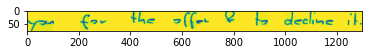

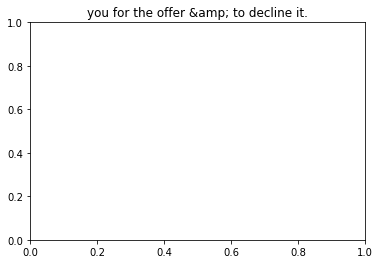

In [7]:
dataset.show_image(8087)

In [4]:
for i, data in enumerate(tqdm(dataset)):
    if ';' in data["text"]:
        print(i, data["text"])

  4%|███                                                                          | 532/13353 [00:00<00:22, 580.98it/s]

450 issue behind the Health Service; the other
460 Service; the other tried to show that the


  6%|████▉                                                                        | 850/13353 [00:01<00:21, 571.55it/s]

759 going out of action; Police were visiting
761 to pass the time of day"; Supporters had
763 with the committee was going too far; another


  7%|█████▌                                                                       | 973/13353 [00:01<00:22, 547.53it/s]

915 sphere; and it is not difficult to see that President


  9%|██████▌                                                                     | 1162/13353 [00:02<00:20, 600.35it/s]

1037 gone; he is having lessons on
1072 as a military project; or that the European space satellite
1086 be justified from a scientific point of view;


 11%|████████▏                                                                   | 1442/13353 [00:02<00:17, 677.57it/s]

1322 as to the safety of the people of Great Britain;


 12%|█████████                                                                   | 1603/13353 [00:02<00:15, 735.00it/s]

1495 review the United Nations Secretariat;
1496 nuclear tests; the canard about British
1498 in the Congo; Kuwait; and South-East


 13%|█████████▉                                                                  | 1748/13353 [00:02<00:17, 669.37it/s]

1664 years; Sub-committees set up to strip


 16%|███████████▉                                                                | 2098/13353 [00:03<00:18, 625.21it/s]

2001 non-combatant help was wanted; but they
2093 this likely; Formula Two, which appeared in June, made it
2094 very unlikely; if Formula Three restores the original
2104 and decisive ones; but without it, we could not


 18%|█████████████▍                                                              | 2354/13353 [00:03<00:18, 596.98it/s]

2266 pleasant time. The weather forecast is good; except for them,
2296 returned to the shed; their books tidied; and often,
2336 too. It is said by some that he is a saint; by


 19%|██████████████▍                                                             | 2542/13353 [00:04<00:18, 595.92it/s]

2474 with a theodolite, six surveyors, a ball;
2521 need them as slaves to # our Kultur; otherwise


 23%|█████████████████                                                           | 3005/13353 [00:05<00:19, 543.79it/s]

2925 marvellous joke; no one has learned anything. Wicki
2976 sense of plot, matters much; but in the sense of
2992 Donahue; and Claudette Colbert, still


 25%|██████████████████▊                                                         | 3315/13353 [00:05<00:20, 488.68it/s]

3273 for herself; we would be altogether clearer
3283 herself; we would be altogether clearer in our
3292 error in allowing Irene to speak for herself;
3302 for herself; we would be altogether clearer
3313 for herself; we would be altogether clearer
3324 for herself; we would be altogether clearer


 26%|███████████████████▉                                                        | 3509/13353 [00:06<00:21, 468.12it/s]

3440 law, always comically grotesque; they were
3450 always comically grotesque; they were not asked
3460 grotesque; they were not asked to modulate from
3470 comically grotesque; they were not
3480 father-in-law, always comically grotesque;
3490 father-in-law, always comically grotesque;


 29%|██████████████████████                                                      | 3880/13353 [00:06<00:18, 519.37it/s]

3787 the empties; through the door hearts are


 31%|███████████████████████▊                                                    | 4186/13353 [00:07<00:15, 604.00it/s]

4100 VINEYARDS (1 Kings 4.25; S. of Sol. 8.11).


 32%|████████████████████████▌                                                   | 4318/13353 [00:07<00:14, 619.34it/s]

4251 means in the day-time; all the days of
4262 And they are (1) Matzo; (2) Bitter Herbs; (3) Salt-water and
4264 appearance of mortar); and (4) an attitude to lean
4285 meek: "But the meek shall inherit the earth; and shall
4288 (1) Matzo represents Peshat; (2) Moraur
4289 represents Remez; (3) Dipping-in represents
4290 Derush; (4) Leaning-back represents Saud.
4303 were eating in Mitzrajim, to show they were willing to learn;
4385 cause and then deal with it; show it


 33%|█████████████████████████▎                                                  | 4453/13353 [00:07<00:14, 597.61it/s]

4435 my hand; That my hand is big Big,


 35%|██████████████████████████▋                                                 | 4681/13353 [00:08<00:17, 504.76it/s]

4641 known comment on the verse; quoted by


 36%|███████████████████████████▋                                                | 4856/13353 [00:08<00:15, 555.69it/s]

4736 to a collar; these add a charming, feminine


 37%|████████████████████████████▎                                               | 4975/13353 [00:08<00:15, 550.98it/s]

4883 common supply; it lends itself to making
4885 furniture, fitments, garden items, toys, etc.;
4887 quickly; it is less expensive than most
4888 other materials; it is a pleasant material
4889 to work with; and, although it does


 39%|█████████████████████████████▌                                              | 5202/13353 [00:09<00:14, 556.89it/s]

5128 trifle; this can be cleaned up later. As you are
5194 their optimum depth; and this coincides with the suitable


 40%|██████████████████████████████▏                                             | 5311/13353 [00:09<00:15, 515.93it/s]

5234 often start off the "local" herring;
5253 sometimes; and the high swimming,
5258 to be dying out; but a full discussion of
5270 (Just how the seine ropes do this is not yet proved; it may
5272 sand; or even in the case of flat fish, by vibrations
5300 would seem to be even more essential;


 41%|███████████████████████████████                                             | 5467/13353 [00:09<00:12, 622.34it/s]

5359 three survived the journey; one thrived
5375 brittle nature; even with reasonably careful
5397 favour of their abolition; in fact one
5408 substitutes; the former may last indefinitely
5442 blocks; so can such flowering plants as
5452 propagating; there can be no progression to a
5454 to be moved; it must be planted out or
5467 nurseryman; there is also considerable saving
5469 There are many types of plastic pots available;
5470 some expensive, some quite cheap; some good


 43%|████████████████████████████████▌                                           | 5712/13353 [00:10<00:13, 573.43it/s]

5656 the Glasgow Corporation Further Education Department;
5657 the Workers' Educational Association; the University
5659 of psychology, education and social science; ....


 44%|█████████████████████████████████▌                                          | 5900/13353 [00:10<00:13, 551.94it/s]

5827 nected with railway construction; and there


 45%|██████████████████████████████████▏                                         | 6014/13353 [00:10<00:13, 538.42it/s]

5935 compartment; but he seemed to have
5939 glishman would not do; nothing an Ame-
5940 rican would not say; nothing an
5941 Italian would not sing; no music
5943 dance; nothing the German would
5944 not covet; and nothing the Chinese
5948 would not do; nothing an American would not
5949 say; nothing an Italian would not sing; no
5950 music to which the Frenchman would not dance;
5951 nothing the German would not covet; and
5977 day; the desire to share something more intimate
5993 tongues; unreasonable surfeit, too, in the
6000 himself go; and it was from his simpler
6024 because their pots would not stand fire; but Jacob
6033 because their pots would not stand fire;


 46%|██████████████████████████████████▉                                         | 6148/13353 [00:10<00:12, 596.41it/s]

6045 embers wide; Above the coals the smoking
6055 throws a bed of glowing embers wide;
6088 article in their festal preparations; and it is the
6100 essential article in their festal preparations;
6106 essences fell upon him; and one of the
6110 ancients made use of flowers; they were


 47%|███████████████████████████████████▋                                        | 6274/13353 [00:11<00:11, 607.54it/s]

6223 could outdo; Green herbs, red peppers,
6231 never could outdo; Green herbs, red peppers, mussels,
6277 ABSOLUTELY LAUGH; BUT ALL THE
6283 very funny story which made Carlyle absolutely laugh;
6311 moment had charge of the mine; the mine collapsed


 48%|████████████████████████████████████▊                                       | 6468/13353 [00:11<00:12, 556.42it/s]

6373 and the vague advantages of military glory;
6445 London was again in turmoil; but this time


 49%|█████████████████████████████████████▍                                      | 6586/13353 [00:11<00:13, 510.49it/s]

6531 cent made sacrifices for their fellow men;


 51%|██████████████████████████████████████▌                                     | 6773/13353 [00:11<00:11, 575.45it/s]

6692 such a beautiful building with suitable fittings; I made


 52%|███████████████████████████████████████▌                                    | 6952/13353 [00:12<00:11, 573.81it/s]

6843 is a great resource. Vesuvius seems to be tired;
6855 resource. Vesuvius seems to be tired; he
6865 resource. Vesuvius seems to be tired; he is going
6875 seems to be tired; he is going out fast.... What a gay,
6883 a great resource. Vesuvius seems to be tired; he is going out
6892 tired; he is going out fast.... What a gay, lively people,
6901 resource. Vesuvius seems to be tired; he is
6911 seems to be tired; he is going out fast.... What a gay,
6921 to be tired; he is going out fast.... What
6931 is a great resource. Vesuvius seems to be tired;
6942 to be tired; he is going out fast.... What a gay, lively
6951 resource. Vesuvius seems to be tired; he is going
6963

 53%|████████████████████████████████████████▎                                   | 7085/13353 [00:12<00:10, 612.59it/s]

 Vesuvius seems to be tired; he
6972 resource. Vesuvius seems to be tired; he is going
6983 to be tired; he is going out fast.... What a gay, lively
6992 seems to be tired; he is going out fast.... What a gay,


 63%|███████████████████████████████████████████████▋                            | 8374/13353 [00:14<00:07, 634.05it/s]

8274 with what was best in him; dead his memory
8372 support and comfort at the time; but it
8384 evidently not passed on that information;


 64%|████████████████████████████████████████████████▍                           | 8500/13353 [00:14<00:08, 548.03it/s]

8450 them as owner-occupiers; occupied in connection with
8451 employment or as part of business premises; rented
8453 landlord (if so, whether furnished or unfurnished); or
8492 the Ministry of Health submitted evidence to us;
8553

 65%|█████████████████████████████████████████████████                           | 8615/13353 [00:14<00:08, 555.94it/s]

 as medically advisable; (b) the precautions which medical


 65%|█████████████████████████████████████████████████▋                          | 8728/13353 [00:15<00:08, 528.81it/s]

8668 households; average consumption by older couples and other
8674 childless couples; in households containing children,
8702 milk was reduced; since 1957 it has again declined. Most of the
8704 potatoes and milk; for fresh green vegetables, fruit, cheese, fish and
8746 1960; the types of occurrence which have to be


 67%|██████████████████████████████████████████████████▊                         | 8917/13353 [00:15<00:07, 590.39it/s]

8825 sites; and rents vary considerably according to the demand


 71%|█████████████████████████████████████████████████████▊                      | 9455/13353 [00:16<00:05, 660.42it/s]

9334 was complete under these conditions; but when the tracer


 71%|██████████████████████████████████████████████████████▏                     | 9522/13353 [00:16<00:06, 578.10it/s]

9460 calyptopis from 1800-2200 hr; 2nd,
9461 from 2200-0200 hr; and 1st, from 0200-0600 hr.
9540

 72%|██████████████████████████████████████████████████████▌                     | 9582/13353 [00:16<00:07, 521.12it/s]

 erences has been proposed; diff-
9545 when it occurs before dawn; but this
9613 no office hours, however elastic; their lives were
9617 curry, had their desired effect on us;


 73%|███████████████████████████████████████████████████████▎                    | 9715/13353 [00:16<00:06, 580.67it/s]

9660 of the social graces; but, naturally, he said
9684 a quick little grimace of acknowledgement; then raised


 74%|████████████████████████████████████████████████████████▎                   | 9902/13353 [00:17<00:05, 582.37it/s]

9809 her fan, in passing; but she did not wait for
9932

 75%|████████████████████████████████████████████████████████▎                  | 10026/13353 [00:17<00:05, 573.21it/s]

 stared speechlessly at the golden bear; Vittoria swiftly
9945 the baths had lost their purpose; they had become
9974 aware that the pace was slackening;
9980 its jaunty plume blotted out the light; his hand
10020 'She is absolutely safe,' he replied; but he turned,


 76%|█████████████████████████████████████████████████████████▎                 | 10213/13353 [00:17<00:05, 572.20it/s]

10130 quite an erotic little beast; can
10225 only thing that saved her; it gave her the strength


 80%|████████████████████████████████████████████████████████████▎              | 10748/13353 [00:18<00:04, 651.00it/s]

10684 It was a warm, still evening; the plop of
10718 From this side, Rivermead was less forbidding;
10723 ancient boathouse shrouded in wistaria; it


 81%|█████████████████████████████████████████████████████████████              | 10877/13353 [00:18<00:04, 558.02it/s]

10813 abroad; and no pedestrian to cross his path nor to wait
10846 once; but Steve insisted that they should first discuss
10868 I haven't a clue; but, who knows,
10886 on her part; but he thought it a good idea


 82%|█████████████████████████████████████████████████████████████▋             | 10990/13353 [00:18<00:04, 533.23it/s]

10922 First, it was Sunday morning; and, second, everyone
10929 faces very disconcerting; and looking at


 84%|██████████████████████████████████████████████████████████████▋            | 11157/13353 [00:19<00:04, 543.97it/s]

11075 GO; but the reason probably lay in elementary
11119 gazed at recently; and I have no
11140 would be inopportune; and with the idea came
11145 observation I permitted myself unruffled;
11173 Thomas and her five-year-old son Cadwallader;
11174 pretty little Morfydd Owen; Mr. Stanley Hayball


 84%|██████████████████████████████████████████████████████████████▉            | 11212/13353 [00:19<00:03, 538.20it/s]

11176 Birmingham; Price the Provisions; and the
11247 good man, mind; knew his job. But out of


 86%|████████████████████████████████████████████████████████████████▍          | 11466/13353 [00:19<00:03, 608.58it/s]

11366 it was a pity at all; as, indeed, they didn't.


 87%|█████████████████████████████████████████████████████████████████          | 11593/13353 [00:19<00:02, 593.84it/s]

11526 to switch on the lights; there was no colour -
11538 Plain of Lombardy; to the right, Turin; to the
11562 He was able to trace the course of the river; he


 88%|█████████████████████████████████████████████████████████████████▊         | 11714/13353 [00:20<00:02, 584.94it/s]

11647 he asked, letting in the clutch. "No; I want


 89%|███████████████████████████████████████████████████████████████████        | 11945/13353 [00:20<00:02, 545.96it/s]

11879 said; "but I'd better stop thinking that now.
11921 school; some of his rigid ideas had been passed
11941 Seaweed's memory was prodigious; her manner


 91%|████████████████████████████████████████████████████████████████████       | 12123/13353 [00:20<00:02, 550.87it/s]

12031 contact, is our Robbie; he gives us the gen and


 94%|██████████████████████████████████████████████████████████████████████▊    | 12615/13353 [00:21<00:01, 626.53it/s]

12538 when she was not free; this much they had
12594 looked distinguished when he frowned; boyishly
12646 come with me; you hope I'll miss you; you


 95%|███████████████████████████████████████████████████████████████████████▌   | 12747/13353 [00:21<00:01, 574.46it/s]

12709 doctor would be free during the day; tea was served


 96%|████████████████████████████████████████████████████████████████████████▏  | 12860/13353 [00:22<00:00, 494.22it/s]

12803 He was better; he had made a


 99%|██████████████████████████████████████████████████████████████████████████ | 13187/13353 [00:22<00:00, 541.00it/s]

13126 The flat was on the third floor; two rooms; soft Provenc*?
13127 6al view; good intimate furnishing and colour; running
13129 basin and bidet; own private, modern lavatory. The
13149 No, he hadn't read it; Madame did all the
13154 sun came out; Mart went shopping; I


100%|███████████████████████████████████████████████████████████████████████████| 13353/13353 [00:23<00:00, 577.99it/s]

13323 chamber; and Philip and I waited with
13339 dark; and we went on together to


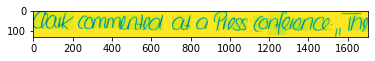

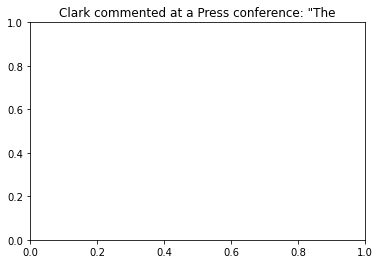

In [19]:
dataset.show_image(769)

In [17]:
for i, data in enumerate(tqdm(dataset)):
    if '+' in data["text"]:
        print('+', i, data["text"])
    if '-' in data["text"]:
        print('-', i, data["text"])
    if ':' in data["text"]:
        print(':', i, data["text"])

  0%|▎                                                                              | 52/13353 [00:00<31:27,  7.05it/s]

- 13 Though they may gather some Left-wing support, a
- 15 turn down the Foot-Griffiths resolution. Mr.
- 22 which would appear to "prop up" an out-dated
- 24 Though they may gather some Left-wing
- 26 M Ps are likely to turn down the Foot-
- 34 which would appear to "prop up" an out-
- 35 Though they may gather some Left-wing support, a
- 37 down the Foot-Griffiths resolution. Mr. Foot's line
- 38 will be that as Labour 0M Ps opposed the Govern-
- 43 appear to "prop up" an out-dated institution.


  1%|▋                                                                             | 127/13353 [00:00<11:25, 19.29it/s]

: 99 future. Said Mr. Nkumbula last night:
: 110 last night: "We want to discuss what to
: 118 future. Said Mr. Nkumbula last night:


  1%|▉                                                                             | 166/13353 [00:00<08:08, 26.99it/s]

- 149 plans do not give the Africans the overall majo-
- 158 been boycotted by the two main settlers' parties -
- 162 to Chequers at the week-end for talks with
- 169 boycotted by the two main settlers' parties -
- 174 the week-end for talks with Mr. Macmillan.
- 180 settlers' parties - the United Federal Party
-

  2%|█▎                                                                            | 219/13353 [00:01<04:31, 48.34it/s]

 184 at the week-end for talks with Mr. Macmillan.
- 186 Mr. Macleod was not at the week-end meeting. But he told
: 187 M Ps yesterday: "I have no knowledge of secret negotiations."
- 194 Mr. Macleod was not at the week-end
: 195 meeting. But he told M Ps yesterday: "I
- 204 Northern Rhodesia is a member of the Fede-
- 205 ration. Mr. Macleod was not at the week-end
: 206 meeting. But he told M Ps yesterday: "I
- 216 sent from the Government were "unsatisfac-
- 217 tory." African delegates to the talks yester-
- 220 Mr. Julius Greenfield. He was at Che-
- 221 quers last week-end. They said they
- 232 at Chequers last week-end. They said they regarded


  2%|█▌                                                                            | 270/13353 [00:01<02:40, 81.72it/s]

- 239 strong opposition from the anti-Negro
- 250 opposition from the anti-Negro senators of the
- 259 It has aroused strong opposition from the anti-Negro
- 269 by another Southern Senator - Willis Robertson,
- 270 of Virginia - met today in closed session
- 281 Southern Senator - Willis Robertson, of
- 282 Virginia - met today in closed session to
-

  2%|█▊                                                                           | 323/13353 [00:01<01:43, 125.37it/s]

 289 gossip" that Weaver once had Communist affilia-
- 291 is headed by another Southern Senator -
- 292 Willis Robertson, of Virginia - met today in
- 298 alleged association with organisations black-
- 301 Robertson saying the Federal Bureau of In-
- 306 nomination before it can be con-
- 309 alleged association with organisations black-
- 319 association with organisations black-listed by the
- 331 He said bluntly in Washington yester-


  3%|██▏                                                                          | 378/13353 [00:01<01:16, 170.39it/s]

- 332 day that the offer - 357million - was
- 342 the offer - 357million - was not good enough.
- 351 that the offer - 357million - was not good


  3%|██▌                                                                          | 437/13353 [00:02<01:00, 214.52it/s]

- 400 answer is the once-and-for-all cash
- 404 to pay more - and increase taxation to do
- 405 so - or run the obvious # risks in upsetting
- 409 once-and-for-all cash offer of 357million. President
- 412 more - and increase taxation to do so - or
: 417 spot. Joyce Egginton cables: President
- 418 Kennedy at his Washington Press con-
: 427 Joyce Egginton cables: President Kennedy
- 434 This surprising statement was a sharp about-
- 444 Mr. Brown, passionate and warm-hearted, led
- 446 charges. Mr. Powell, white-faced and outwardly
- 447 unemotional, replied with a statistical state-
- 448 ment - and ended by inciting Labour M Ps
- 451 tried to show that the balance-sheet must
- 453 Mr. Brown, passionate and warm-hearted,
- 

  4%|██▉                                                                          | 502/13353 [00:02<00:50, 252.29it/s]

455 charges. Mr. Powell, white-faced and
- 457 statistical statement - and ended by inciting
- 461 balance-sheet must always come first.
: 485 this letter which Mr. Gaitskell had received:
- 498 old -." Mr. Brown went on: "We
: 498 old -." Mr. Brown went on: "We
- 508 wicked, old -." Mr. Brown went on: "We
: 508 wicked, old -." Mr. Brown went on: "We


  4%|███▏                                                                         | 561/13353 [00:02<00:48, 263.10it/s]

: 517 never were." Interrupted by angry Tories, Mr. Brown retorted:
: 525 Mr. Brown retorted: "The jackals bay
- 528 different - fundamentally different from that of Labour. They
- 530 wretched - but it would not be too comfortable nor too easy to
- 537 services was wholly different - fundamentally
- 540 wretched - but it would not be too comfortable


  5%|███▌                                                                         | 624/13353 [00:02<00:45, 279.14it/s]

- 588 a full minute - and even his bitterest opponents
- 597 cheered for a full minute - and even his
- 611 the financing - which Mr. Powell
- 612 claimed was underpinning - not
- 613 undermining - the service. Answering the
- 622 adjust the financing - which Mr. Powell
- 623 claimed was underpinning - not undermining -
- 632 the financing - which Mr. Powell claimed was
- 633 underpinning - not undermining - the service.


  5%|███▉                                                                         | 681/13353 [00:02<00:50, 249.40it/s]

- 649 hand-picked team under the leadership of
- 659 in touch in London. Three of them - Canada, Australia,
- 660 New Zealand - will have strong delegations at an opening
- 667 negotiators in several fields. Sir Pier-
- 670 his days as Britain's chief UN dele-
- 672 Eric Roll, 53-year-old Deputy Secre-
: 676 Other leading members are: Sir Henry Lintott from
- 678 Corell-Barnes (Colonial Office), Mr. G. R. Bell
- 686 Foreign Minister, and Mr. Heath. MR. Selwyn Lloyd -
- 687 a man with troubles enough back home - seems
- 692 Ghana coinciding with the meeting of the Com-
- 693 monwealth Economic Consultative Council - the
- 694 first to be held in Africa. Only a few hours af-
- 695 ter Mr Lloyd and his 24-strong delegation landed
- 697 demonstrated outside the British-owned Kingsway
: 701 week. Root of the discontent: The austerity Budget,


  6%|████▎                                                                        | 748/13353 [00:03<00:44, 282.21it/s]

: 712 to tell. Today's Ghanaian Times (motto: "The welfare
: 713 of the people is the supreme law") reports: "The
- 714 Government has been urged to take immediate ac-
- 734 At 9.40 Mr. Edusei, Minister of Transport and pro-
- 742 If the threatened "counter-revolution" was not * to bring
- 754 openly intimidating members of Earl Russell's nuclear-
: 758 It alleged: Phones were being tapped and
- 762 been warned - one that his connection
- 764 that anti-apartheid agitation was
- 768 by plain-clothes men. Committee-member Mr. George
: 769 Clark commented at a Press conference: "The
- 771 committee members will appear at Bow-street
- 773 Lord Boyd-Orr, the Rev. Michael Scott, and


  6%|████▋                                                                        | 818/13353 [00:03<00:41, 305.45it/s]

- 783 yesterday. His secretary, American-born
: 784 Mr. Ralph Schoenman, said:
- 791 discussed a sit-down at Watford at 5.30 p.m. - none
- 808 than 500 people - 167 of them members of
- 809 the UNIP - were convicted last month in the
- 813 doing is in the name of non-violence," said
: 826 JOHN DICKIE writes: Mr. Macmillan gave top
- 850 aged 24, is now studying history at Cambri-
:

  7%|█████▎                                                                       | 918/13353 [00:03<00:32, 379.41it/s]

 857 The question: Their status in an independent Uganda.
- 867 to meet head-on the biggest challenge to
- 869 "Ban-the-Bomb" demonstrators. Police leave
- 871 to deal with the mass sit-down rally planned
- 872 for Sunday in Parliament-square by the
- 873 Committee of 100, the anti-nuclear arms
- 879 president 89-year-old Earl Russell and
- 880 his 61-year-old wife were each jailed for
- 886 declare the whole rally illegal - whether
- 887 the demonstrators sit down or not - was
: 895 Measures agreed so far include: 1. A mass
- 896 call-out of police, special constables
- 899 the area - West End Central, Bow-street,
- 900 and Cannon-row.
- 901 Today, for example, the Foreign Minister of Indo-
- 913 inter-African consultative assembly which would
- 925 of the talks in Belgrade - and on both the two
- 930 Souvanna Phouma, the former Prime Min-
- 944 into the pro-communist north and the


  8%|█████▊                                                                      | 1016/13353 [00:03<00:28, 427.36it/s]

- 945 pro-western centre and south.
- 950 of the pro-communist forces
- 954 of the pro-communist Neo Lao
- 960 of the pro-communists. Most of the
- 965 recapture of Vang Vieng, the pro-
- 970 this village was still held by the pro-communists.
- 981 else in sight to supplant him. So the con-
- 985 when in spite of carefully worded state-
- 998 in the four federal by-elections last October the party
- 999 fared badly. They are now faced with four other by-
- 1002 Maritimes - Restigouche Madawaska, New Brunswick,
- 1022 hustings, the spellbinder that Mr. Diefen-
-

  8%|██████▍                                                                     | 1130/13353 [00:03<00:25, 485.43it/s]

 1042 much lessly trounced by Mr. Diefen-
- 1046 ammunition given him by the Gov-
- 1080 rise in taxation - something no one is prepared
- 1111 for it - and therefore of any budget
- 1114 Fiat G-91, and the F 104 Starfighter,
-

  9%|███████▏                                                                    | 1259/13353 [00:04<00:21, 553.58it/s]

 1149 morning. He is to make a 30-minute nation-wide
- 1153 third talks - the first were at Key West, Florida, the second in
- 1154 Washington - said: "Their discussions covered the major problems,
: 1154 Washington - said: "Their discussions covered the major problems,
- 1158 economic co-operation and expansion in the general interests
- 1172 State, gave a 90-minute briefing on the Vienna talks to the
- 1173 15-nation Nato council. Some of his listeners said he was
- 1192 meeting, peace-loving people will say 'a
- 1211 MR. GAITSKELL today delivered a full-blooded


 10%|███████▊                                                                    | 1375/13353 [00:04<00:21, 551.09it/s]

- 1277 Inter-union jealousies prevent the
- 1288 urgent - particularly in unions serving
- 1289 workers in the same industry - along
- 1313 first of these reasons is the importance of pre-
: 1335 believes: "It is very questionable whether
- 1343 interest for the whole world - East and
- 1344 West and uncommitted nations - is the
- 1353 contain a five-year plan for the three
- 1355 equipped, all-Regular forces of
- 1363 complete co-operation at all levels in training
-

 11%|████████▏                                                                   | 1448/13353 [00:04<00:20, 593.76it/s]

 1378 approval. Mr. Watkinson remains con-
- 1382 return to the tradition of all-Regular
- 1411 from the C.I.G.S., Field-Marshal Sir
- 1413 in the principle of an all-Regular army.
- 1418 as from Nov. 1. The hand-over, due in
- 1429 the Prime Minister. This implies the dis-
- 1433 returned in their strongholds, like Bloem-
- 1447 Nationalists and 20 United party candi-
- 1472 but we must not - and I am not - be
- 1477 the fall-out position in view of the Russian
- 1491 the two-day debate on foreign affairs.
- 1492 He began in a low, almost chatty mono-
- 1498 in the Congo; Kuwait; and South-East
- 1500 He spent most of his short half-hour on
- 1511 Mr. Macmillan explained that he had deliber-


 12%|█████████                                                                   | 1599/13353 [00:04<00:17, 664.68it/s]

- 1517 would have created a thoroughly unde-
- 1527 remarkable degree of sub-normality.
- 1549 early stages of to-night's debate. Mr.
- 1551 golf-course Press conference, which he
- 1572 bingo-parlour."
- 1577 the Left-wing opinion so coolly snubbed last
- 1583 Council to reassess the fall-out position in
- 1594 through a cliche-ridden Foreign Office
- 1598 series of heavy sighs. Sir Lynn Ungoed-
- 1600 Labour Solicitor-General, and Mrs. Barbara
- 1602 of them Left-wing # sympathisers.
- 1611 A POLITICAL CORRESPONDENT writes: Ban-the-
: 1611 A POLITICAL CORRESPONDENT writes: Ban-the-
:

 13%|█████████▊                                                                  | 1734/13353 [00:04<00:18, 634.56it/s]

 1647 Mr. Wilson's offer in mind. Guy Eden writes:
- 1651 quick in-and-out speculator deals.
: 1657 ETU. In reply to the call for his resignation he said: "Our rules
- 1661 I should commit hara-kiri.
: 1662 The other TUC demands: Five leading
- 1664 years; Sub-committees set up to strip
- 1669 agreed to postpone operation of the sub-
- 1677 heat, transport and medical treatment - all
- 1680 Union can be seen here - a truly inspiring
- 1684 forces of the Warsaw Pact countries -
- 1685 the Communist "Nato." He said rocket-
: 1691 and added: "It is the most disastrous thing any Prime
: 1693 concluded: "The best service the Prime Minister can do
: 1723 House was crowded. He said: "No # British
: 1730 Government's intention:


 14%|██████████▋                                                                 | 1874/13353 [00:05<00:17, 646.65it/s]

- 1785 all-time peak.
- 1787 sixth successive week - this
- 1815 tell: The U.S. - It is false to say the absence of a peace
: 1815 tell: The U.S. - It is false to say the absence of a peace
- 1817 with its militarists and revenge-seekers, is becoming a
- 1821 BRITAIN - One cannot but wonder at British bases being
- 1824 cities. FRANCE - One can hardly conceive the French are
- 1828 With fire and sword France denies Algeria the right to self-
- 1830 WEST GERMANY - Russia would like to see a clear #
- 1835 Behind Bonn's slogan of German self-
- 1864 not clear-cut.
- 1876 On the other hand, those who favour expulsion, inclu-
- 1882 THE Commonwealth is a multi-racial society. A
- 1900 trigger-finger and the ritual slaughter of beasts
- 

 15%|███████████▍                                                                | 2017/13353 [00:05<00:17, 658.62it/s]

1909 Pakistan are happy memories. WEST GERMANY - followed
- 1910 yesterday by the Dutch - has made the gesture
- 1914 in the direction of live-and-let-live. Hopes
- 1916 co-operation, which is the only way to solve the
- 1927 by failing until now to co-operate as a creditor nation
- 1940 good-neighbour gesture, Germany takes a really big
- 1946 by co-operation.
- 1948 for by that curious body Moral Re-Armament.
- 1982 which have undertaken the task of pre-
- 2001 non-combatant help was wanted; but they
- 2006 re-established in their port by negotiation
- 2015 relief when this strife-torn land gets
- 2026 A good neighbour to those Africans who will con-
-

 16%|███████████▊                                                                | 2085/13353 [00:05<00:17, 635.64it/s]

 2035 It is impossible to make contact with Dr. Ver-
- 2037 makes illusory any hopes that he may be in-
: 2066 for it again: another Royal Wedding. Between
- 2076 ought to run - and greater than President
: 2080 Government as a basis for talks: and
- 2083 cool-headed and inventive negotiation, is
- 2087 but it says what is necessary - that
- 2118 have had to take the consequences. Mean-
: 2121 many people: they too will be glad
- 2123 But discussion on current points of east-west con-
- 2126 cannot be followed together. What the council has done -
- 2127 and it is an achievement - is to make religious con-
- 2141 but also the backing of the DIRECTOR GENERAL of the Meteoro-
- 2144 asked to help. To begin with, both tempe-


 17%|████████████▋                                                               | 2221/13353 [00:05<00:17, 633.80it/s]

- 2163 Can it be shown that the one scale is demon-
- 2168 public to go over to decimal coinage - in certain
- 2170 suit their convenience - rather than to change their
- 2176 the adoption of the twenty-four hour
- 2179 that the well-meaning corporation
- 2183 storm. Belgium is accused - without a
- 2184 scrap of evidence - of being implicated in
- 2226 the B.B.C.: - Go ahead! ONE man beyond all others is saddened
: 2226 the B.B.C.: - Go ahead! ONE man beyond all others is saddened
: 2229 Newmarket urban council, says: "I shall always feel this as a
- 2240 Scot - and so were four of his predecessors this # century.
- 2244 His ex-Eoka Government decides that Cyprus will join it for
- 2255 for the week-end. Ford Motors are to put 13,000
- 2256 men back on a five-day week.
- 2265 their protest against the H-bomb. They ought to have a
- 2281 find dedicated leaders at cut-rate prices. But it is


 18%|█████████████▋                                                              | 2411/13353 [00:05<00:18, 588.92it/s]

- 2306 scrapped. The ill-conceived Monckton Commission was
- 2312 caused a crisis - a crisis that never should have happened.
- 2313 No wonder there is doubt and fearful heart-searching.
- 2333 the 88-year-old standard bearer of the Ban-
- 2334 the-Bomb crusade, has devoted following.
- 2335 Thousands march with him - and sit with him
: 2348 ask themselves this question: How long would
- 2351 Board. The board is laying a cable along a seven-
- 2361 "jelly-boned." He promises to preserve federation
: 2363 individuals in the West. Some may ask: Is
- 2386 country's history the old-fashioned virtue of thrift
: 2402 Platt, both aged 19. Eric says: "We believe in the


 19%|██████████████                                                              | 2471/13353 [00:06<00:18, 580.65it/s]

- 2413 on new techniques - and on the universities to
- 2421 these three men has a date with destiny - the
: 2427 took out a piece of paper, wrote his address on it and added:
- 2430 The other incident occurred in the boat-train from Cherbourg
: 2434 slightly stunned. Afterwards they said: "We thought
- 2439 the Luddites took sledge-hammers to their looms and
- 2444 the stop-watch manufacturing methods that
- 2453 is processed, by high-speed listening to recorded
- 2461 audio-TV training techniques, he can be switched
: 2496 saying: "I am innocent of the blood of this just person."
: 2498 said:
- 2508 who used the system - and used it with power and authority.
- 2509 The appalling thing about the Germans is that they can kid them-
: 2519 thus: "Whether nations live in prosperity or starve
- 2526 invasion of our islands all the "able-bodied


 19%|██████████████▊                                                             | 2598/13353 [00:06<00:18, 569.43it/s]

- 2528 seventeen and forty-five will, unless the
- 2540 to their customers - who incidentally
- 2543 hectoring, out-of-date language, but in spite of all
- 2549 a bean for the next twenty-one days.
- 2552 impressed with this poem but, on re-
- 2554 guilty interest in the devilment busi-
- 2556 hell-bound under a strict Presbyterian
: 2567 building bombers, and added:
- 2568 "Without Britain's tolerance German rearma-
: 2590 Nato council meeting last year over the question: do we
- 2591 fight a 30-day war or a 90-day war?
- 2592 A 90-day war, the West German


 20%|███████████████▍                                                            | 2711/13353 [00:06<00:21, 498.38it/s]

- 2634 by Right-Wing Labour in this country. They have
- 2636 in pursuit of the old familiar anti-Soviet
- 2650 Draughtsmen, writing in his personal capa-
- 2651 city:* # I WAS pleased to read J. R. Camp-
: 2651 city:* # I WAS pleased to read J. R. Camp-
- 2654 policy decisions established at the Scar-
- 2670 anti-Nato, anti-Tory, anti-bomb and anti-German
- 2674 understood that the bread-and-butter struggles
- 2693 and the call for party unity - in effect,
- 2711 were confused, clear policy details -
- 2712 as on bases - were decisively carried.
-

 21%|███████████████▋                                                            | 2762/13353 [00:06<00:21, 500.73it/s]

 2723 speeded-up drive to improve West
- 2726 Market, and the kite-flying on Spain
- 2729 working class to sharp new dangers - that
- 2734 Government to carry through Tory policy -
- 2750 and those who are for this policy - which is the
- 2752 It is impossible for Labour's new Defence state-
- 2757 Defence statement, while accepting that Britain can-
- 2760 nuclear weapons and the H-bomb, placing
- 2769 clear who controls the American H-bomb, and
- 2801 most of the hopeful 15-year-olds leaving school
- 2808 The heli-hopping Duke of Edinburgh,
- 2812 young people aged 15-17 starting
- 2814 went into unskilled work. The per-


 21%|████████████████▎                                                           | 2870/13353 [00:06<00:20, 512.75it/s]

: 2817 speaking from experience, stated:
- 2854 behaviour and a vision of mischief-
- 2863 Miracle of Father Malachias") and Michael-
- 2864 angelo Antonioni's "La Notte." The num-
- 2870 may well be a landmark in the revitali-
- 2880 is now on view in a Berlin gallery is most im-
: 2882 playwright and author, wrote: "Wicki's blacks
- 2890 every instant." The chilling horror of "Mala-
- 2891 chias" is due as much to Wicki the photo-
- 2898 of a little monk who prays that a disrepu-
- 2899 table night club near his church be re-
- 2921

 22%|█████████████████                                                           | 2992/13353 [00:07<00:18, 555.41it/s]

 Here, the guests arrive in ghost-like yachts,
- 2933 It is most unfair to call "Malachias" a cut-rate
- 2941 Jean-Luc Godard's disappointing "Une Femme
- 2942 est une Femme," a ninety-one minute hymn
- 2946 out into a series of repetitious sight-gags
- 2950 This director is at last being re-evaluated and
- 2952 German film. Most charming was his tongue-in-cheek
- 2959 Sentence Database  C02-059
- 2973 that air of improvisation, as of off-the-cuff
- 2978 that of a man on the run (Jean-Paul Belmondo),
- 2981 in Moderato Cantabile (curiously trans-
- 3001 part-author with Miss Delaney of the script,
- 3008 Mr. Tony Richardson, who is also part-author with
- 3015 directed by Mr. Tony Richardson, who is also part-
- 3022 Square Theatre tomorrow. It has been pro-
- 3024 who is also part-author with Miss Delaney


 23%|█████████████████▋                                                          | 3103/13353 [00:07<00:19, 516.94it/s]

- 3032 also part-author with Miss Delaney of the
- 3040 Richardson, who is also part-author with
- 3062 This is not a filmed play. It has been con-
- 3074 story, and the marriage of the central charac-
- 3080 This is not a filmed play. It has been con-
- 3089 This is not a filmed play. It has been concei-
- 3102 and wet pavements, the school play-grounds,
- 3104 strewn canals - even the worn head-stones
- 3105 in the churchyard, "sacred to the memory of" -
- 3110 wet pavements, the school play-grounds, the
- 3111 public monuments and the rubbish strewn canals -
- 3112 even the worn head-stones in the churchyard,
- 3113 "sacred to the memory of" - are seen as an
- 3118 the school play-grounds, the public monuments and
- 3119 the rubbish strewn canals - even the worn


 24%|█████████████████▉                                                          | 3156/13353 [00:07<00:20, 490.16it/s]

- 3120 head-stones in the churchyard, "sacred to the
- 3121 memory of" - are seen as an integral part of
- 3126 and wet pavements, the school play-grounds,
- 3128 canals - even the worn head-stones in the
- 3130 - are seen as an integral part of the
- 3136 play-grounds, the public monuments and
- 3137 the rubbish strewn canals - even the
- 3138 worn head-stones in the churchyard, "sacred
- 3139 to the memory of" - are seen as an
- 3144 streets and wet pavements, the school play-
- 3146 rubbish strewn canals - even the worn
- 3147 head-stones in the churchyard, "sacred to
- 3148 the memory of" - are seen as an integral
- 3154 play-grounds, the public monuments and
- 3155 the rubbish strewn canals - even the worn
- 3156 head-stones in the churchyard, "sacred to
- 3157 the memory of" - are seen as an inte-


 24%|██████████████████▌                                                         | 3255/13353 [00:07<00:21, 480.02it/s]

- 3207 clumsily, but half shyly and half in-
- 3218 her his forlorn gift of companionship and sym-
- 3219 pathy - "you need someone to love you while
- 3227 gift of companionship and sympathy - "you need
- 3237 of companionship and sympathy - "you need someone
- 3248 sympathy - "you need someone to love you while
- 3251 by an old man. Here it is a young homo-
- 3257 and gives her his forlorn gift of com-
- 3258 panionship and sympathy - "you need someone
- 3262 by an old man. Here it is a young homo-
- 3269 forlorn gift of companionship and sympathy -


 25%|███████████████████▎                                                        | 3399/13353 [00:07<00:21, 461.84it/s]

- 3319 exacting role, that of the sergeant, gives a perfor-
- 3334 of Betti's writing without over-emphasizing
- 3342 of Betti's writing without over-emphasizing
- 3350 writing without over-emphasizing them. Last night's
- 3351 play in the "Play of the Week" series on indepen-
- 3357 elements of Betti's writing without over-
- 3360 television, Then We Fall, by Mr. Paul Fer-
- 3366 of Betti's writing without over-emphasizing
- 3375 over-emphasizing them. Last night's play
- 3400 of its subject by attempting to generate a melo-


 26%|███████████████████▌                                                        | 3446/13353 [00:08<00:22, 432.62it/s]

- 3402 and the world around him in complete, unredee-
- 3421 around him in complete, unredeemable de-
- 3424 faith in the way in which Mr. Ferris mani-
- 3435 Mr. William Lucas (Morris) is always insensi-
- 3439 events, and Mr. Aubrey Richards, the father-in-
- 3449 events, and Mr. Aubrey Richards, the father-in-law,
- 3459 Richards, the father-in-law, always comically
- 3461 their set moods but played with proper effi-
- 3467 James Maxwell, the editor, always comi-
- 3469 Aubrey Richards, the father-in-law, always
-

 26%|████████████████████                                                        | 3534/13353 [00:08<00:23, 416.64it/s]

 3475 Mr. William Lucas (Morris) is always insen-
- 3480 father-in-law, always comically grotesque;
- 3485 Mr. William Lucas (Morris) is always insensi-
- 3490 father-in-law, always comically grotesque;
- 3548 in a new show. To paraphrase his well-known ditty:
: 3548 in a new show. To paraphrase his well-known ditty:
- 3549 "He'll have the limelight, they'll give him the girls -
- 3552 old, star-studded West End than he will ever feel in
- 3553 Hollywood. His American bosses, 20th-Century Fox, have
- 3554 recently given Frankie the full, razzamataz, red-carpet


 27%|████████████████████▋                                                       | 3633/13353 [00:08<00:23, 421.46it/s]

- 3557 doing better here, before the platinum-plated Hollywood
- 3560 was swamped by the know-how of Marilyn Monroe
- 3564 business. He plays an aspiring actor - a
- 3565 selfish, arrogant, brash, ambitious, unscrupulous heel -
- 3568 He double-crosses the five pals with whom he lives,
- 3572 true as a smooth-tongued, ill-mannered Yank. His
- 3579 VERDICT: Vaughan should have by-passed this approach.
: 3579 VERDICT: Vaughan should have by-passed this approach.
- 3583 He has earned his break. The film is a well-made
- 3591 herrings in this "Find-the-body" thriller. VERDICT:
: 3591 herrings in this "Find-the-body" thriller. VERDICT:
- 3596 (Leicester-square Theatre, "A").
- 3598 newly-weds Ian Carmichael and Janette Scott let
- 3601 half-way through, the plot (as well as the boat) springs
- 3602 a near-disastrous leak. Familiar members of Britain's
- 3603 repertory team of comedy character-actors jump through
: 3605 VERDICT: The "bunk" needed doubling.
- 3621 re-book Gene Detroy and his 

 28%|█████████████████████                                                       | 3691/13353 [00:08<00:21, 458.32it/s]

 3635 lot - this time Brian Rix lost his skirt instead
- 3638 the cast. I especially liked the tea-cup
- 3641 Carole Shelley as the newly-wed and Larry Noble
- 3645 it was accidental - I hope not. If ever a bag of
- 3652 right way - so the best-seller charts say. Play
- 3655 don't like things as they should be - not on
- 3659 A PACKET OF DRAWING-PINS. "Why not," thought ex-soldier
- 3660 Mr. Lisbon, who is twenty-three, and lives in Dagenham, Essex,
- 3661 "press a thumb-tack into the nose of the hammers that strike
- 3664 Then he tried it out for sound. Um-chink...
- 3665 um-chink... it went. Slightly flat and jangly in
- 3669 hauled his thumb-tacked joanna the thirteen
: 3672 compositions, "Deerstalker" and "Almost Grown Up." VERDICT:
: 3673 Mr. Lisbon has it taped. And tacked. And he says: "Just as well
- 3674 I had only one box of tacks - it might have been so
- 3675 different...." More news from the ivory-thumping dept....
: 3677 comes in with another of his own works: "Parade of 

 28%|█████████████████████▌                                                      | 3793/13353 [00:08<00:19, 479.65it/s]

- 3741 claimed he had seen a vision of God - only the padre and his
- 3745 him of his ugly battle-dress, to leave him for
- 3746 what he was - Potter, a frightened boy who had a
- 3752 first-class performance last night as a
- 3763 "Britain - Blood, Sweat, and Tears... Plus
- 3764 Twenty Years," was anti-British.
- 3769 British personalities. Among them - Professor
- 3779 IT is mid-morning on a Dublin Sunday. The streets
- 3782 a house in Anglesey-road is a congregation who
- 3790 hard-core Friends of Brendan. They listen
- 3793 roller-coaster, with occasional stops for an old
- 3794 I.R.A. air or a Connemara tear-jerker.
- 3804 At last Brendan - to the journalist's
- 3805 relief - turns his attention to
- 3814 That's as bloody silly as calling a Rolls-
- 3816 flower in a cultural desert. "Now, me - I'm
- 3829 third astronaut went up - what's his name?


 29%|██████████████████████▏                                                     | 3893/13353 [00:09<00:20, 469.79it/s]

- 3833 Shepard and that Salvation Army chap Gagarin -
- 3841 Canadian, during a chat about space-flight:
: 3841 Canadian, during a chat about space-flight:
- 3851 he was "off the gargle - a retired
- 3853 heard of often in the newspapers -
- 3863 What happened to the new book partially tape-recorded
- 3865 I have before me now a 12,000-word manuscript of
: 3868 begins: "There was a party to celebrate Deirdre's
: 3876 round for the pals, one of whom cries:
- 3877 I AM happy to report that I saw some-
- 3879 either in pictures or outside - a budgerigar
- 3885 Leicester-square), which suggests that it
- 3886 is either using a stand-in for the stunt
- 3890 touch) in the film, which is better-
- 3891 than-average glossy comedy, Hollywood-
- 3894 sun-terrace of the Hotel Splendido (renamed
- 3896 Portofino - and if there's a better view
- 3898 2e-and-nightie ensembles not too well designed for sleeping in,
- 3899 and Rock Hudson at the wheel of a shining silver Rolls-Royce.
- 3903 after this

 30%|██████████████████████▋                                                     | 3989/13353 [00:09<00:19, 473.18it/s]

 3922 the chief spokesman of the jeans-and-
- 3929 middle-aged romancers respectably wed and
- 3936 THE Marriage-Go-Round (Carlton)
- 3938 but fun-films toting an X
- 3940 look-out that the jokes about
- 3944 slapstick. This has only one gag -
- 3946 The girl is a knock-out (see pic-
- 3947 ture of Julie Newmar for con-
- 3956 Nobel prize-winning father to be
- 3959 The Marriage-Go-Round is not entirely a waste of
- 3963 Home-making and is now known as Domestic
- 3972 IL GRIDO (The Cry) - Paris Pullman -
- 3979 20-month-old Charles Jun. was sleeping.
- 3982 She thrust out her hand - and felt
: 3984 gripping a loaded rifle, told his wife:
- 3990 four years later of a German-
- 3993 to the raree-show emotionalism
- 3994 and sensation-hunger of that
- 4002 present state of the Gospel is the result of an accident-prone history. The


 31%|███████████████████████▍                                                    | 4107/13353 [00:09<00:17, 521.45it/s]

- 4027 scholars who have compared the many manu-
- 4045 the paragraph 7.53-8.11, the Woman
- 4069 a simple and serviceable book. It was robust - the number
- 4071 this - and it was easily stored. It had two disadvantages. It
- 4072 was generally a single-sided form of book, and it was not
- 4076 ecclesiastical circles. In his Natural History, 13.11-12,
- 4077 the elder Pliny tells of the use of papyrus in roll-making.
- 4096 in the case of the single-sheet quire, an extra
- 4101 The word is a Persian loan-word,
- 4102 pairi-deaza, from which our word paradise
- 4113 construction in lines 9, 23-25 of the Moabite Stone,
- 4114 which read: And I built Baal-meon and made
: 4114 which read: And I built Baal-meon and made
- 4130 as a very precious diamond-stone and very adamant.


 32%|████████████████████████                                                    | 4225/13353 [00:09<00:16, 552.36it/s]

- 4133 word "SHAMIR" means guarded or preser-
: 4136 prayer says: "What am I? A worm", he
- 4143 cuts and polishes Altar-Stones. Such
- 4144 a man is the Shamir that guards him-
- 4156 refused, but it is to become the head-stone
- 4162 crushing our soul" (see Hab. 2, 10-11). And it is
: 4163 through the Shamir: "That the earth shall be
- 4196 gratify selfish aims, then each man will gather-in
- 4201 midst of plenty. Help will not be easily forth-
: 4205 eat and be full but: "Take heed to yourself,
- 4208 the yourself is thy greatest enemy, the self-
- 4211 two masters, and you worship self-interest, isolating
- 4227 shall teach them to your children." And as we have go-
-

 33%|████████████████████████▋                                                   | 4346/13353 [00:09<00:15, 567.08it/s]

 4242 of the Shmah (Numbers 15, 37-41) is
- 4243 called "the going-out of the land of
: 4250 Ben Zoma said: "The days of 1thy life
- 4251 means in the day-time; all the days of
- 4252 1thy life means even at night-time."
: 4257 Deliverance: Passover and its connection
- 4262 And they are (1) Matzo; (2) Bitter Herbs; (3) Salt-water and
: 4270 Education gives: Freedom of Speech. (2) Bitter Herbs
- 4272 We eat it. We accept it, to show we have self-control
- 4274 Self-control gives us: Freedom to worship God. (3) Salt Water and Charauses:
: 4274 Self-control gives us: Freedom to worship God. (3) Salt Water and Charauses:
- 4275 the salt-water at the Seder-Table represents the Covenant of the Torah
- 4278 ourselves and have peace with one-another. And the sweet
- 4279 Mortar (the CHARAUSES in Hebrew) that binds all the "hard-
- 4284 Living the life of the Torah ("dipping-in") makes us
: 4285 meek: "But the meek shall inherit the earth; and shall
- 4289 represents Remez; (3) Dipping-in repr

 33%|█████████████████████████                                                   | 4404/13353 [00:09<00:15, 563.84it/s]

- 4369 first public acts was a hard-hitting battle with
- 4373 Or when he found cock-fighting going on in church?
- 4386 up either for the sham it is - and many
- 4388 irrational pre-conceived notions - or to
- 4393 that children should be molly-coddled - they must be made
: 4434 Was this: That a secret plan Is hid in
-

 34%|█████████████████████████▋                                                  | 4512/13353 [00:10<00:18, 483.10it/s]

 4452 effective, must be of that child-like quality which comes
- 4464 noting the effect of a new stimulus on some-
- 4473 tiredness - such as when your wife mentions
- 4474 the washing-up - while others, if they
- 4481 until the mind got the necessary injection of a fresh - and an
- 4482 attractive - interest! Tiredness has, therefore, as much to do


 35%|██████████████████████████▏                                                 | 4610/13353 [00:10<00:19, 440.28it/s]

- 4539 as fully as possible, without having our energy sapped by un-
- 4544 If we ever stopped to consider how much energy - and time -
- 4556 aimlessly along is more wearying than any-
- 4568 week, they are going to have. If - such
- 4569 a critic may say - you are calling
- 4571 we start by putting us into a strait-jacket
- 4576 commerce may be kept going - though if ever
- 4580 the pressure on over-crowded trains.
- 4587 ago to hear of a school who tried a six-
- 4589 They only worked, of course, a five-
- 4603 day of the timetable it was - but
- 4616 - you must, for example, do your shopping on the morning of


 35%|██████████████████████████▊                                                 | 4709/13353 [00:10<00:18, 457.89it/s]

- 4640 (This is probably to be understood as a well-
- 4656 quoting a well-known question and
: 4663 use of the expression: 'Boaz did it of his own
: 4681 Palestinian teacher, R. Eleazar (3rd Cent.):
: 4682 'The Holy Spirit manifested itself in three places:
- 4689 that he was a great man for lace - paying
: 4692 for his lady, for he records testily: 'My wife
- 4696 reign of Charles 2 stating: 'Lost: a lawn 1hand-
: 4696 reign of Charles 2 stating: 'Lost: a lawn 1hand-
- 4707 to daughters, a lace-trimmed Christening
- 4708 robe that each generation wears in turn -
- 4710 exquisite lace-making of the past.
- 4711 But lace-making is by no means a lost
- 4714 over-furnishing of the Victorian age
- 4718 adapted itself to modern tastes and the ill-
- 4720 how completely it is in sympathy with con-
-

 36%|███████████████████████████▎                                                | 4804/13353 [00:10<00:18, 454.78it/s]

 4724 tatting in fine and medium-weight cottons
- 4727 to mention only three - how satisfying it is
- 4728 to avoid the ready-made in these and by
- 4733 and lovely touch to personal possessions -
- 4734 a lace border to a handkerchief, fine-lace
- 4738 Although we assess lace-making as one of
- 4739 the feminine skills, a number of the well-loved
- 4741 in fact, the brain-children of inventive men.
- 4744 special schools were set up to teach lace-
- 4747 livelihood by lace-making and consequently
- 4759 overcrowded and over-embellished drawing-rooms
- 4760 complete with heavy crochet antimacassars, mantel-
- 4769 hand-crocheted blouses, gossamer fine in
- 4773 Paris - a blouse, delicate gloves or a fine
: 4789 Two methods can be used to join the crochet to the linen:
- 4797 Coats Mercer-Crochet possesses qualities which
- 4803 thickness - it is the ideal crochet thread.
- 4817 correct numbers to use with Mercer-Crochet:
: 4817

 36%|███████████████████████████▌                                                | 4852/13353 [00:11<00:18, 459.75it/s]

 correct numbers to use with Mercer-Crochet:
- 4851 the straight-edge as one relies upon the truth
- 4859 accurate. The straight-edge can be used
- 4872 needed as well as the upper ex-
- 4876 with pencil and straight-edge
- 4884 innumerable useful household items -


 38%|████████████████████████████▌                                               | 5017/13353 [00:11<00:16, 491.56it/s]

- 4904 a man to make simple, straight-forward things, and in
- 4927 Do not buy so-called cheap tools or
- 4947 family man or father-to-be. Unlike many


 38%|████████████████████████████▊                                               | 5073/13353 [00:11<00:16, 509.60it/s]

- 5022 Avoid using lead-based paint as this could prove poisonous
- 5041 job is to make your moulds. In Fig. 1 it quotes 3/4 in. five-ply,
- 5049 and shaping your little craft, upside-down. For cheapness
- 5056 The transoms can be made of any sound five-ply
- 5122 about 4 in. apart and do not counter-sink in


 39%|█████████████████████████████▊                                              | 5234/13353 [00:11<00:16, 495.74it/s]

- 5171 are also closely related to the sea-bed
: 5173 great fisheries that depend on them:
- 5176 a deep-water channel to the Dogger where
- 5183 them - thank Heaven! A good picture of
- 5189 In this 200-fathom trench the herring do not touch the bottom.
- 5193 echo-sounders. Bottom crowding comes when they cannot reach
- 5195 gravelly soil of these many roughs where the spring-
- 5197 The joint evidence of echo-sounders
- 5232 course - one breeze will not do it,
- 5241 wind you will "set" out - or drift to the east-
- 5242 ward, the length of half a fleet of nets -


 40%|██████████████████████████████▎                                             | 5336/13353 [00:11<00:16, 483.72it/s]

- 5260 The Bow-wave Theory. This assumes
- 5277 appear to be the simplest case -
- 5287 the seine-net film this usually seemed to
- 5292 sea-bed, though the footrope in this case
- 5302 Cover in the fast-moving trawl is considered
- 5308 20 million acres are sprayed with dieldrin. An eye-
- 5310 the stench of small game and birds dead from insecti-
- 5323 is not new to the American gardener. Lady-
- 5335 the fully adult, 2 1/2-in.-long insect,
- 5338 According to Dr. Max Beier in "Fang-
- 5343 egg-case of the Chinese mantis. The
- 5345 egg-case on June 6. Both the Chinese


 41%|███████████████████████████████▏                                            | 5488/13353 [00:12<00:13, 593.89it/s]

- 5393 half-broken pots is an unlovely sight
- 5401 relieve his feelings. On the small-to-medium
- 5416 Present-day pots are better finished, do
- 5439 of water. First-class plants of tomatoes,
: 5446 one: the cost of a pot of any description is saved
- 5457 results by buying a small hand-operated soil
- 5461 useful for short-term operations, but are
- 5493 a well-established learner and the world
- 5496 controversy among philosophers and psycho-


 42%|███████████████████████████████▉                                            | 5611/13353 [00:12<00:14, 535.59it/s]

- 5542 concrete it will be at the cost of over-simplification
- 5575 very little about the patterns of brain-activity which
- 5577 psychology is concerned - these patterns are the concern of
- 5578 the neuro-physiologists.
- 5580 weekly wage-earners up to chargehand level
- 5582 therefore selected. A detailed age-structure was
- 5584 revealing that there were (at that time) seven-
- 5586 thirty-three aged sixty-four years, and sixty-
- 5598 of one-and-a-half hours (each held half in
: 5600 now as follows: 1. Personal adjustment 2. Health
- 5611 The original scheme was planned to provide short re-
- 5612 fresher courses at the ages of fifty-five and sixty:
: 5612 fresher courses at the ages of fifty-five and sixty:
- 5623 Rolls-Royce Ltd. and a member of the


 43%|████████████████████████████████▌                                           | 5723/13353 [00:12<00:14, 515.85it/s]

- 5648 crafts, hobbies and leisure-time interests
- 5658 Extra-Mural Education Committee and departments
- 5662 to let older employees attend day-release courses on preparation
- 5664 approach was made to about twenty large firms and in Oc-
- 5665 tober, 1959, the first experimental day-release course for
- 5666 men was organised. Eleven students from seven firms atten-
- 5678 a pre-retirement planning and preparation
- 5682 things in a different way. All the better! - it will
- 5684 itself. Remember your four names - have the list
- 5685 with you if you like - and you simply can't
- 5688 So - see the next page! Yes, they are waiting for you.
- 5690 will eat out of your hand - if they like what
- 5695 are a novice? It's their interest you want - not their
- 5697 GO! Try something like this: It is said that tele-
: 5697 GO! Try something like this: It is said that tele-
: 5708 this way: Well, those are my views.
- 5712 grief-stricken duty formally to identify Elizabeth
- 5713 Camp, aged

 44%|█████████████████████████████████▎                                          | 5847/13353 [00:12<00:13, 546.00it/s]

- 5749 The police began a systematic search of the line -
- 5768 They also had to cope with the usual flood of rumours, so-
- 5780 money to her relatives, and her brother-in-law was asked for
- 5782 woman had been engaged once before - to a barman
- 5792 and a top-hat.
- 5797 at Wandsworth police-station, claiming to have
- 5798 committed the murder - but he was mentally
- 5801 Even the bone cuff-links found beside the body, which
- 5809 the knowledge that he had gone shopping in the town of Guil-
- 5826 them was one of the most dangerous jobs con-
- 5837 wrote an anti-railway industrialist when it was
- 5861 The Merstham Tunnel, on the London-to-
- 5864 24, 1905, a Sunday, Sub-Inspector Peacock, of
- 5867 He sent word straight away to near-by Merstham


 45%|█████████████████████████████████▉                                          | 5959/13353 [00:13<00:14, 513.52it/s]

- 5894 identify her as his sister, Mary Money, aged twenty-two.
- 5898 whom she worked as a book-keeper.
- 5900 evening at about seven o'clock, telling her room-mate, Emma
- 5905 At Clapham Junction a ticket-collector
- 5918 a first-class compartment of the
- 5934 couple struggling in a first-class
- 5938 told us that there was nothing an En-
- 5939 glishman would not do; nothing an Ame-
- 5968 gleam and glitter of our latter-day restaurants.
- 5981 unlimited in its variety and its presen-
- 5985 meal-times of a simpler world to the


 45%|██████████████████████████████████▌                                         | 6071/13353 [00:13<00:13, 534.52it/s]

- 6003 of the 18th century - that amazing epoch of
- 6004 grossness and delicacy - sought inspiration at last from
- 6012 mammoth kitchens of the 18th century -
- 6014 delicacy - sought inspiration at last from
- 6023 make water hot by dropping a red-hot poker into it,
- 6026 his birthright to him for a mess of pottage - and
- 6032 by dropping a red-hot poker into it,
- 6036 to him for a mess of pottage - and then
- 6043 how to do it, too: - When the languid flames at
: 6043 how to do it, too: - When the languid flames at
- 6053 and he knew how to do it, too: - When the
: 6053 and he knew how to do it, too: - When the
- 6081 By delicate application of odours and richly-distilled
- 6092 By delicate application of odours and richly-
-

 46%|███████████████████████████████████▏                                        | 6182/13353 [00:13<00:13, 530.69it/s]

 6096 the grosser pleasures of the board. The grati-
- 6133 A number of newly-born white mice served
- 6141 off a fever. A number of newly-born
- 6178 crescent-shaped breakfast roll created by a pastry cook to
- 6180 cookery is reminiscent of bull-fights, of Spanish dancing
: 6181 and of Goja: it is vivid, highly coloured, sometimes
- 6189 opulent varieties of Czechoslovak past-


 47%|███████████████████████████████████▊                                        | 6297/13353 [00:13<00:13, 527.35it/s]

- 6213 The "pot-au-feu" is as much a national
- 6218 waxed enthusiastic about Bouilla-
- 6219 baisse and sang - This Bouillabaisse
- 6221 broth, or brew, A hotch-potch of all
- 6224 The "pot-au-feu" is as much a national institution
- 6228 about Bouillabaisse and sang - This Bouillabaisse a
- 6230 A hotch-potch of all sorts of fishes That Greenwich
- 6239 intellectual faculties. Bunyan's break-
- 6286 A Scottish knight - Sir John Mercer - was
- 6299 him was the French Admiral, Jean de Vienne -
- 6306 the well-protected fortress of St Malo. This


 48%|████████████████████████████████████▍                                       | 6408/13353 [00:13<00:13, 523.39it/s]

- 6331 advantages of a ring of bridge-heads which included
- 6334 without a large-scale and concentrated invasion.
- 6336 DRAWN AT THE TIME, BECAUSE LARGE-
- 6341 THEIR MONEY WELL SPENT IN FIN-
- 6355 In appreciating this story, modern con-
- 6366 was quite alien to mediaeval thought - its
- 6367 substitute was the mutual self-help of
- 6385 The people - Langland's 'folk' and Gaunt's
- 6386 'knaves' - were villeins still tied to the
- 6393 towns, and the retainers and men-at-arms
- 6396 expected to pay direct taxes. During the four-
- 6399 When the King and his Council required additio-
- 6403 prices, quality and tax could be efficiently su-
- 6405 There were two other sources of public revenue -
- 6422 as ill-defined as the borders between private
- 6423 and national war, and in which the comparati-


 49%|█████████████████████████████████████                                       | 6515/13353 [00:14<00:13, 494.30it/s]

- 6436 the results disappointing - a tax estimated
- 6439 most notorious third poll-tax was agreed
- 6446 over a question of trade rivalry. A rich mer-
- 6455 A sum of 160,000 was demanded - a staggering figure
- 6458 two-thirds of this sum providing the clergy supplied
- 6460 Commons agreed was that of the first poll-tax. The manifest
- 6462 corrected by the sliding scale of the second poll-tax,
- 6464 weight by a flat-rate tax at treble the rate - every adult
- 6465 had to pay three groats, but this time an adult was re-
- 6468 poll-tax had supplied 22,000, a tax of
- 6471 objections to the first two poll-taxes was
- 6473 the poor - but this was only a pious hope
- 6477 from the dissection of living animals, showing how these move-
- 6492 and of the artery-like vein, and expulsion of the
- 6500 hindered by compression, infarction or inter-
- 6505 one can sometimes see it - so to speak
- 6506 - rouse itself and, in reply to two or
- 6520 When eventually the ovens were fixed at the new

 50%|█████████████████████████████████████▋                                      | 6613/13353 [00:14<00:15, 432.71it/s]

- 6543 As they became known the Choir went to working-
- 6546 as the Bakers' Union, for whom they went on Satur-
- 6552 George, and another the dark-haired
- 6571 work. The British Socialist Party endea-
- 6573 Council, and to Parliament, being deter-
- 6593 known to say that it was not ne-


 50%|██████████████████████████████████████▎                                     | 6729/13353 [00:14<00:13, 496.24it/s]

- 6645 First of all simple part-songs: I found only one member who had
: 6645 First of all simple part-songs: I found only one member who had
- 6651 could render simple part-singing tolerably well.
- 6660 by the well-known architect Mr. George Fellowes Prynne,
- 6681 co-operated, we made the little side chapel a place
- 6686 stained-glass lancet windows - finally a new altar -
- 6696 and yet spoil the building with ornaments unsui-
- 6701 there, but was soon changed into the better-
- 6726 co-operation especially with the other Christian communities.
-

 51%|██████████████████████████████████████▉                                     | 6839/13353 [00:14<00:12, 508.32it/s]

 6761 the superintendent who filled in the regi-
- 6783 continuing till old age to-day. When I went
- 6796 Their homes - for since those years they have
- 6797 lived on in Purley - have always been
- 6803 In those early years 1914-18, life was very full
- 6820 general system of "francs-tireurs", to be named
- 6841 much as his health permitted him to enjoy any-
: 6846 other man was a priest: here the priest is
- 6847 1superceded by the soldier - a favourable change
:

 52%|███████████████████████████████████████▋                                    | 6964/13353 [00:15<00:11, 560.25it/s]

 6858 every other man was a priest: here the
- 6859 priest is 1superceded by the soldier -
: 6868 priest: here the priest is 1superceded by the
- 6869 soldier - a favourable change in my eye, particularly
: 6877 other man was a priest: here the priest is 1superceded by
- 6878 the soldier - a favourable change in my eye, particularly
: 6885 Rome, every other man was a priest: here the priest is 1superceded
- 6886 by the soldier - a favourable change in my eye, particularly as
- 6894 a priest: here the priest is 1superceded by the soldier - a
: 6894 a priest: here the priest is 1superceded by the soldier - a
: 6904 was a priest: here the priest is 1superceded by
- 6905 the soldier - a favourable change in my eye,
: 6913 man was a priest: here the priest is 1superceded by
- 6914 the soldier - a favourable change in my eye, particularly
: 6923 At Rome, every other man was a priest:
- 6925 soldier - a favourable change in my eye,
: 6934 other man was a priest: here the priest is
- 6935 1sup

 53%|████████████████████████████████████████▍                                   | 7098/13353 [00:15<00:10, 611.42it/s]

: 6975 a priest: here the priest is 1superceded
- 6976 by the soldier - a favourable change
: 6985 man was a priest: here the priest is 1superceded by
- 6986 the soldier - a favourable change in my eye,
: 6994 other man was a priest: here the priest is 1superceded
- 6995 by the soldier - a favourable change in my eye,


 54%|█████████████████████████████████████████                                   | 7222/13353 [00:15<00:10, 596.72it/s]

- 7116 much rain and damp, but the tempe-
- 7160 the Whigs, and the temporary assumption of the govern-
-

 55%|█████████████████████████████████████████▊                                  | 7354/13353 [00:15<00:09, 620.85it/s]

 7231 the temporary assumption of the govern-
- 7281 'What a frightful event!' he wrote. 'I tremble! What infa-


 56%|██████████████████████████████████████████▏                                 | 7417/13353 [00:15<00:09, 597.47it/s]

- 7358 be so great at the return of Ultra-
- 7370 that the Commons House upon a dis-
- 7374 'What a frightful event!' he wrote. 'I tremble! What infa-
- 7412 that all may go well. Sir R. Peel was here, I under-
- 7418 to which he had been subjected ever since the symp-
- 7428 subjected ever since the symptoms had first shown them-
- 7456 since the symptoms had first shown them-


 56%|██████████████████████████████████████████▉                                 | 7537/13353 [00:16<00:10, 579.04it/s]

- 7475 of his painful malady. None of the numer-
- 7518 malady. None of the numerous con-
- 7528 effective alleviation of his painful mala-


 58%|████████████████████████████████████████████                                | 7738/13353 [00:16<00:09, 591.62it/s]

- 7642 as 1830, when Anglesey believed him-
- 7659 In April of that year his first wife's brother-in-law,
- 7668 brother-in-law, the diplomatist Lord
- 7677 In April of that year his first wife's brother-in-law,
- 7684 In April of that year his first wife's brother-in-law, the
- 7691 In April of that year his first wife's brother-in-law, the
- 7698 In April of that year his first wife's brother-in-law, the
- 7704 In April of that year his first wife's brother-in-law, the
- 7710 In April of that year his first wife's brother-in-law,
- 7718 In April of that year his first wife's brother-in-law,
- 7725 In April of that year his first wife's brother-
- 7726 in-law, the diplomatist Lord Ponsonby, had
- 7734 In April of that year his first wife's brother-in-law,
-

 58%|████████████████████████████████████████████▍                               | 7798/13353 [00:16<00:09, 582.44it/s]

 7741 In April of that year his first wife's brother-in-law, the
- 7749 brother-in-law, the diplomatist Lord Ponsonby,
- 7758 brother-in-law, the diplomatist Lord
- 7759 Ponsonby, had written to advise Angle-
- 7767 In April of that year his first wife's bro-
- 7768 ther-in-law, the diplomatist Lord Pon-
- 7777 In April of that year his first wife's brother-in-law, the diplomatist
- 7784 In April of that year his first wife's brother-in-law,


 60%|█████████████████████████████████████████████▌                              | 7995/13353 [00:16<00:08, 629.53it/s]

- 7902 of Europe. One of these was the Neapo-
- 7924 gentle and charming character, even-tempered
- 7934 even-tempered and sedate, not easily irritated,
- 7942 with a gentle and charming character, even-tempered
- 7951 charming character, even-tempered and sedate, not
- 7958 man with a gentle and charming character, even-tempered
- 7965 character, even-tempered and sedate, not easily irritated, patient and
- 7971 with a gentle and charming character, even-tempered and
- 7979 character, even-tempered and sedate, not easily
- 7987 even-tempered and sedate, not easily irritated, patient
- 7996 even-tempered and sedate, not easily
- 8006 charming character, even-tempered and sedate,
- 8014 charming character, even-tempered and sedate,
-

 61%|██████████████████████████████████████████████▎                             | 8136/13353 [00:16<00:08, 639.33it/s]

 8023 charming character, even-tempered and
- 8034 and charming character, even-tempered
- 8038 Mauro's first action was to write to his re-
- 8040 asking for advice. In doing so he descri-
- 8044 gentle and charming character, even-tem-
- 8052 gentle and charming character, even-tempered and
- 8060 character, even-tempered and sedate, not easily
- 8074 which the Crown has to bestow - the salary has
- 8076 being understood that the Governor is not here-
: 8081 The reply was not bereft of asperity: 'Beaudesert,
- 8104 travelling-carriage in the royal coach-houses, which
- 8112 scarcely strength to answer, and took up his gold-
- 8122 EFFECT' - NOT IN SPITE OF HIMSELF AND SIR
- 8125 CORFU THE WHOLE TIME AND NEVER INTER-
- 8132 'immediately carried into effect' - not in spite of himself
- 8133 and Sir Frederick Stoven, but with their perfect con-
: 8140 IS SATIRICAL: 'I HAVE NOT THE 1HONOR OF ANY
:

 62%|███████████████████████████████████████████████                             | 8269/13353 [00:17<00:08, 630.71it/s]

 8150 satirical: 'I have not the 1honor of any acquaintance with Mr
- 8165 DISORDER - 'TOKENS THAT THE PILGRIM
- 8167 FLOOR, - AS RUBBISH OF NO MARKE-
- 8173 to have found everything in uttermost disorder - 'tokens that
- 8174 the Pilgrim had most treasured, scattered on the floor, -
- 8201 twenty-three years of age when he undertook a load
- 8205 his good looks - for he 'carried the passport of a very
- 8206 handsome person' - his good manners and his perfect
: 8212 received a visit from him: I have today seen
- 8213 Count Gamba - which was very distressing
- 8214 for many reasons but quite unavoidable - he
- 8221 him: I have today seen Count Gamba - which was very
: 8221 him: I have today seen Count Gamba - which was very
- 8222 distressing for many reasons but quite unavoidable -
: 8233 the stealthy fires of her animosity: and
: 8242 feeding the stealthy fires of her animosity:


 63%|███████████████████████████████████████████████▋                            | 8370/13353 [00:17<00:10, 483.07it/s]

- 8278 divagations of her 'poor brother' - so she
- 8279 constantly referred to him - there were a
- 8283 the warmth of her kindly nature to others -
- 8284 or to herself - she believed implicitly in
- 8299 than it would be for most 20th-century ladies
- 8311 terrible indiscretions - the writing of Don Juan,
- 8322 by Dallas. Letters between a mother and a son -
: 8352 pronouncements: he had inherited nothing


KeyboardInterrupt: 

In [3]:
a = 0.0
if a:
    print(a)

In [4]:
print("[%4d]" % (5))

[   5]


In [13]:
train = dataset[:1]

ValueError: not enough values to unpack (expected 2, got 1)

In [7]:
train

{'image': tensor([[255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]]),
 'text': 'A MOVE to stop Mr. Gaitskell from'}

In [15]:
print((:5))

SyntaxError: invalid syntax (<ipython-input-15-4e2c816df5d3>, line 1)

In [19]:
import os
from xml.dom import minidom
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage import io

import torch
from torch.utils.data import Dataset
import torchvision.transforms.functional as TF
from torchvision import transforms

import config

# path of the dataset
path = config.DATASET_PATH

class HandWritingLinesDataset(Dataset):
    def __init__(self, transform=None):
        xml_files = []
        for (_, _, file) in os.walk(path + "xml"):
            xml_files.extend(file)

        xml_files = [xml_file for xml_file in xml_files if xml_file.endswith("xml")]

        self.line_id = []
        self.line_text = []
        for xml_file in tqdm(xml_files):
            xml_data = minidom.parse(path + "xml/" + xml_file)
            items = xml_data.getElementsByTagName('line')
            for item in items:
                if len(item.attributes['text'].value) < config.MAX_LEN_ALLOWED:
                    self.line_id.append(item.attributes['id'].value)
                    self.line_text.append(item.attributes['text'].value)

        self.transform = transform

    def __len__(self):
        return len(self.line_data)

    def __getitem__(self, index):
        print(index)
        name_split, text = self.line_id[index], self.line_text[index]
        name_split = name_split.split('-')

        text = self.clean_text(text)
        
        image_path = self.getImagePath(name_split)
        image = io.imread(image_path)
        if self.transform is not None:
            image = self.transform({
                    "image": torch.tensor(image, dtype=torch.float),
                    "text": text
                }
            )
        else:
            image = {
                "image": torch.tensor(image, dtype=torch.float),
                "text": text
            }

        return image

    def getImagePath(self, name_split):
        return path + "lines/" + name_split[0] + "/" + name_split[0] + "-" + name_split[1] + "/" + name_split[0] + "-" + name_split[1] + "-" + name_split[2] + ".png"

    def show_image(self, data):
        if isinstance(data, int):
            item = self.__getitem__(data)
        else:
            item = data

        image = item["image"]
        text = item["text"]

        plt.figure()
        plt.imshow(image)
        plt.pause(0.001)
        plt.title(text)
        plt.show()

    def clean_text(self, text):
        text = text.replace("&quot;", "\"")
        text = text.replace("&amp;", "&")
        return text

In [20]:
dataset = HandWritingLinesDataset()

100%|██████████████████████████████████████████████████████████████████████████████| 1539/1539 [00:19<00:00, 80.73it/s]


In [21]:
dataset[1]

1


{'image': tensor([[255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]]),
 'text': 'nominating any more Labour life Peers'}

In [22]:
dataset[0:5]

slice(0, 5, None)


ValueError: too many values to unpack (expected 2)

In [24]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = slice(0, 5)
a[b]

[1, 2, 3, 4, 5]

In [35]:
b.stop

5

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision.transforms.functional as TF
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage import io, transform

import config
from model import Image2TextNet
from dataset import HandWritingLinesDataset
from preprocessing import Rescale
import engine

dataset = HandWritingLinesDataset(transform=Rescale((config.IMAGE_H, config.IMAGE_W)))

100%|██████████████████████████████████████████████████████████████████████████████| 1539/1539 [00:31<00:00, 49.50it/s]


In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision.transforms.functional as TF
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage import io, transform
import torch.nn as nn

import config
from model import Image2TextNet
from dataset import HandWritingLinesDataset
from preprocessing import Rescale
import engine
import model
import importlib
import utils
importlib.reload(model)
importlib.reload(config)

# train_len = int(config.TRAIN_PART * len(dataset))
train = DataLoader(dataset, batch_size=config.BATCH_SIZE)
# test = DataLoader(dataset[train_len:], batch_size=config.BATCH_SIZE)
# test_len = len(test)

net = model.Image2TextNet()

# optimizer = optim.SGD(net.parameters(), lr=config.LEARNING_RATE, momentum=0.9)
optimizer = optim.Adam(params=net.parameters(), lr=config.LEARNING_RATE)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
for epoch in range(config.N_EPOCHS):
    epoch_loss = engine.train_fn(train, net, optimizer, device, epoch)
    print("[%4d / %4d] Epoch Loss: [%.6f]" % (epoch. config.N_EPOCHS, epoch_loss))

In [25]:
def loss_fn(outputs, targets, device):
    output_lengths = torch.full(
        size=(config.BATCH_SIZE,), 
        fill_value=config.TIME_STEPS, 
        dtype=torch.long
    ).to(device)
    # targets = [line + (" " * (256 - len(line))) for line in targets]
    target_lengths = torch.tensor(
        [len(target) for target in targets], 
        dtype=torch.long
    ).to(device)
    target_val = torch.ones((1), dtype=torch.long)
    for target in targets:
        target_val = torch.cat((target_val, utils.stringToClasses(target)), 0)
    target_val = target_val[1:].to(device)

    # print("Outputs:")
    # print(outputs)
    # print("Outputs Lengths:")
    # print(output_lengths)
    # print("Targets:")
    # print(target_val)
    # print("Target Lengths:")
    # print(target_lengths)

    loss = nn.CTCLoss()(outputs, target_val, output_lengths, target_lengths)
    return outputs, output_lengths, targets, target_val, target_lengths, loss
    # return loss

In [ ]:
model.train()
running_loss = 0
batches = 0

for bi, d in enumerate(train):
    optimizer.zero_grad()

    inputs, targets = d["image"], d["text"]
    inputs = inputs.view(-1, 1, config.IMAGE_H, config.IMAGE_W)
    outputs = model(inputs)
    loss = loss_fn(outputs, targets, device)
    running_loss += loss
    batches += 1
    # loss.backward()
    # optimizer.step()
    print("[%4d / %4d][%4d / %4d] Loss: [%.6f]" % (epoch, config.N_EPOCHS, bi, len(data_loader), loss.item()))

In [26]:
for bi, d in enumerate(train):
    a = d["image"]
    print(a.size())
    a = a.view(-1, 1, 16, 128)
    b = d["text"]
    break

torch.Size([1, 16, 128])


torch.Size([1, 1, 16, 128])


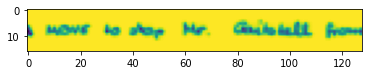

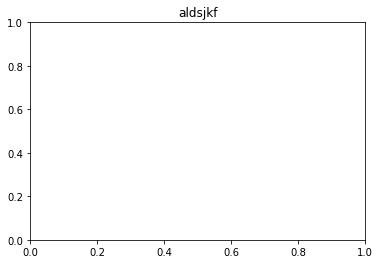

'A MOVE to stop Mr. Gaitskell from'

In [27]:
print(a.size())
dataset.show_image({"image": a[0][0], "text": "aldsjkf"})
b[0]

In [28]:
print(net)
c = net(a)
c.size()

Image2TextNet(
  (CNN): Image2TextConvNet(
    (context_net): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU()
      (5): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
    )
  )
  (RNN): Image2TextRecurrentNet(
    (recurrent): LSTM(128, 32, bidirectional=True)
    (reduce): Linear(in_features=64, out_features=80, bias=True)
  )
)


torch.Size([128, 1, 80])

In [29]:
outputs, output_lengths, targets, target_val, target_lengths, loss = loss_fn(c, b, device)

In [31]:
outputs.size()

torch.Size([128, 1, 80])

In [32]:
output_lengths

tensor([128], device='cuda:0')

In [33]:
targets

['A MOVE to stop Mr. Gaitskell from']

In [34]:
target_val

tensor([28,  1, 40, 42, 49, 32,  1, 73, 68,  1, 72, 73, 68, 69,  1, 40, 71, 13,
         1, 34, 54, 62, 73, 72, 64, 58, 65, 65,  1, 59, 71, 68, 66],
       device='cuda:0')

In [35]:
target_lengths

tensor([33], device='cuda:0')

In [36]:
len(targets[0])

33

In [37]:
loss

tensor(13.7180, grad_fn=<MeanBackward0>)

In [38]:
outputs

tensor([[[-4.3938, -4.5979, -4.4505,  ..., -4.3178, -4.0391, -4.3581]],

        [[-4.3748, -4.6446, -4.4455,  ..., -4.3405, -4.0266, -4.3742]],

        [[-4.2898, -4.5352, -4.3738,  ..., -4.3098, -4.0580, -4.3614]],

        ...,

        [[-4.1039, -4.6862, -4.6347,  ..., -4.3155, -4.2686, -4.1974]],

        [[-4.2099, -4.4232, -4.5861,  ..., -4.3849, -4.3030, -4.2607]],

        [[-4.1482, -4.5304, -4.7220,  ..., -4.5781, -4.2948, -4.3993]]],
       grad_fn=<ViewBackward>)

c


['a', 'b']

In [16]:
z = torch.tensor([2, 2])
z

tensor([2, 2])

In [18]:
z.unsqueeze(1)

tensor([[2],
        [2]])